<a href="https://colab.research.google.com/github/laume/solar_generation/blob/master/Solar_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://storage.googleapis.com/kaggle-datasets-images/9968/14092/fb926b76adbd93d9495830f9c00db450/dataset-cover.jpg?t=2018-01-17-18-15-21)

# Solar generation and demand Italy 2015-2016
### Two-years hourly-recorded data of solar power generation and electricity demand

https://www.kaggle.com/arielcedola/solar-generation-and-demand-italy-20152016

## Prepare environment

### Setup Kaggle variables:

In [205]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
KAGGLE = True
DOWNLOAD_DATA = True
COMPETITION = 'kaggle datasets download -d arielcedola/solar-generation-and-demand-italy-20152016'
DATA_DIR = 'data/solar'
UNARCHIVE_DATA = True

### Install libraries and perform setup

In [0]:
!pip install --upgrade -q dlai

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 3.8MB 31.1MB/s 
     |████████████████████████████████| 450kB 45.2MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.


In [0]:
import dlai
from dlai.imports import *

print(f'dlai version: {dlai.__version__}, tf version: {tf.__version__}')

dlai version: 0.0.16, tf version: 2.0.0


In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
!pip install -q -U toai

     |████████████████████████████████| 296kB 5.3MB/s 
     |████████████████████████████████| 153kB 45.8MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 


In [0]:
%matplotlib inline

In [0]:
if KAGGLE:
    setup_kaggle()

In [0]:
if DOWNLOAD_DATA:
    download_kaggle_data(COMPETITION, DATA_DIR)

In [0]:
!ls {DATA_DIR}

TimeSeries_TotalSolarGen_and_Load_IT_2015.csv
TimeSeries_TotalSolarGen_and_Load_IT_2016.csv


Make DATA_DIR as a path for further use:

In [0]:
DATA_DIR = Path(DATA_DIR)

In [0]:
TEMP_DIR = Path("/content/gdrive/My Drive/solar")

In [0]:
# TEMP_DIR.mkdir(parents=True)

## Explore the data

In [0]:
!ls {DATA_DIR}

TimeSeries_TotalSolarGen_and_Load_IT_2015.csv
TimeSeries_TotalSolarGen_and_Load_IT_2016.csv


In [0]:
data15 = pd.read_csv(DATA_DIR/'TimeSeries_TotalSolarGen_and_Load_IT_2015.csv')
data16 = pd.read_csv(DATA_DIR/'TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')

In [0]:
data15.head()

,utc_timestamp,IT_load_new,IT_solar_generation
0,2015-01-01T00:00:00Z,NaN,0
1,2015-01-01T01:00:00Z,NaN,0
2,2015-01-01T02:00:00Z,NaN,0
3,2015-01-01T03:00:00Z,NaN,0
4,2015-01-01T04:00:00Z,NaN,0


In [0]:
data15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
utc_timestamp          8760 non-null object
IT_load_new            8401 non-null float64
IT_solar_generation    8760 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 205.4+ KB


In [0]:
data15.describe()

,IT_load_new,IT_solar_generation
count,8401.000000,8760.000000
mean,32900.393644,2214.022831
std,7604.359566,3249.824785
min,17268.000000,0.000000
25%,26219.000000,0.000000
50%,32414.000000,29.000000
75%,39215.000000,4077.250000
max,54279.000000,11476.000000


In [0]:
data16.head()

,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01T00:00:00Z,21665.0,1
1,2016-01-01T01:00:00Z,20260.0,0
2,2016-01-01T02:00:00Z,19056.0,0
3,2016-01-01T03:00:00Z,18407.0,0
4,2016-01-01T04:00:00Z,18425.0,0


In [0]:
data16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
utc_timestamp          8784 non-null object
IT_load_new            8712 non-null float64
IT_solar_generation    8784 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.0+ KB


In [0]:
data16.describe()

,IT_load_new,IT_solar_generation
count,8712.000000,8784.000000
mean,32262.212236,2049.831853
std,7288.629858,2845.846870
min,16716.000000,0.000000
25%,25909.500000,0.000000
50%,31654.500000,68.000000
75%,38685.750000,3923.500000
max,48986.000000,15824.000000


In [0]:
len(data15), len(data16)

(8760, 8784)

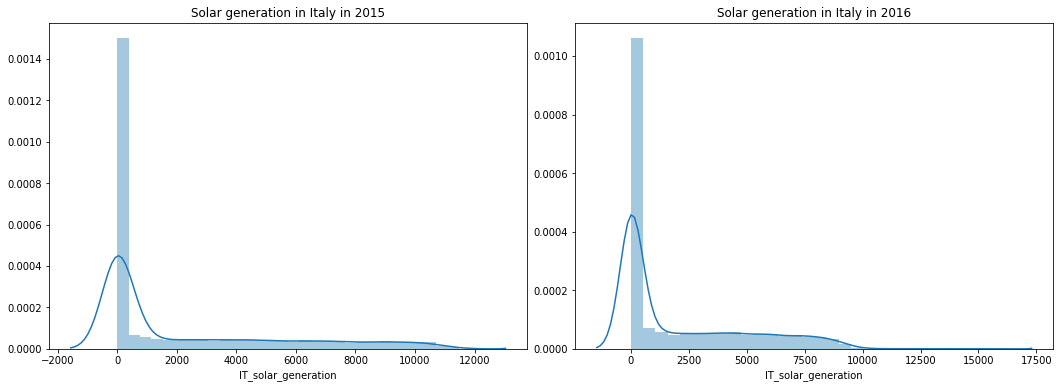

In [0]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.distplot(data15.IT_solar_generation, bins=30, ax=ax[0]).set_title('Solar generation in Italy in 2015')
sns.distplot(data16.IT_solar_generation, bins=30, ax=ax[1]).set_title('Solar generation in Italy in 2016')
plt.subplots_adjust(wspace=0.1)

In [0]:
data15_notnull = data15[data15.IT_solar_generation > 500]
data16_notnull = data15[data16.IT_solar_generation > 500]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


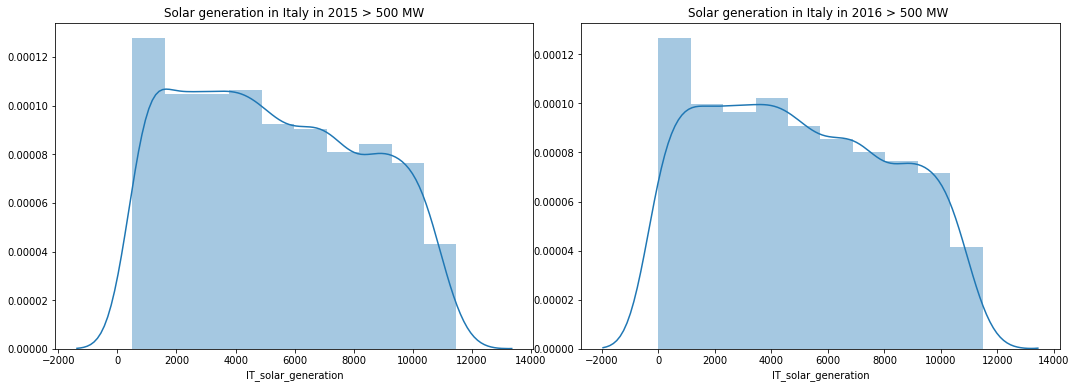

In [0]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.distplot(data15_notnull.IT_solar_generation, bins=10, ax=ax[0]).set_title('Solar generation in Italy in 2015 > 500 MW')
sns.distplot(data16_notnull.IT_solar_generation, bins=10, ax=ax[1]).set_title('Solar generation in Italy in 2016 > 500 MW ')
plt.subplots_adjust(wspace=0.1)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


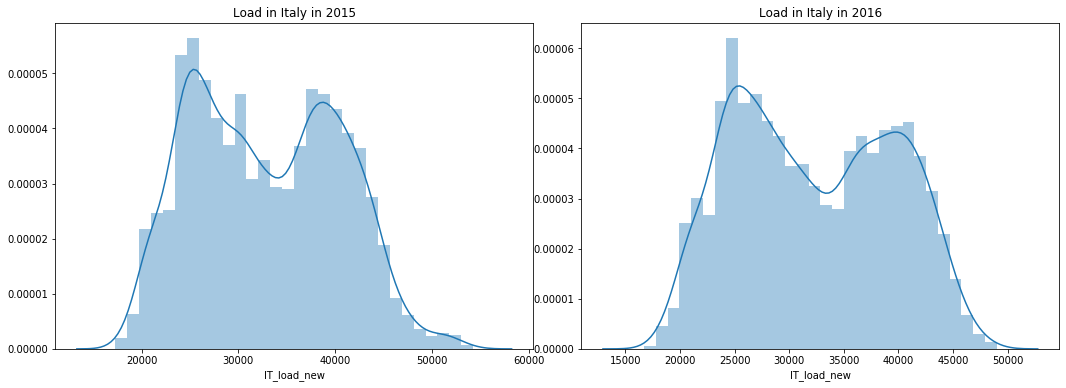

In [0]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.distplot(data15.IT_load_new, bins=30, ax=ax[0]).set_title('Load in Italy in 2015')
sns.distplot(data16.IT_load_new, bins=30, ax=ax[1]).set_title('Load in Italy in 2016')
plt.subplots_adjust(wspace=0.1)

In [0]:
for index, row in data15.iterrows():
    year, month, day = row[0].split('-')
    day = day.split('T')[0]
    data15.loc[index, "month"] = month
    data15.loc[index, "day"] = day

data15.head()

,utc_timestamp,IT_load_new,IT_solar_generation,month,day
0,2015-01-01T00:00:00Z,NaN,0,01,01
1,2015-01-01T01:00:00Z,NaN,0,01,01
2,2015-01-01T02:00:00Z,NaN,0,01,01
3,2015-01-01T03:00:00Z,NaN,0,01,01
4,2015-01-01T04:00:00Z,NaN,0,01,01


In [0]:
for index, row in data16.iterrows():
    year, month, day = row[0].split('-')
    day = day.split('T')[0]
    data16.loc[index, "month"] = month
    data16.loc[index, "day"] = day

data16.head()

,utc_timestamp,IT_load_new,IT_solar_generation,month,day
0,2016-01-01T00:00:00Z,21665.0,1,01,01
1,2016-01-01T01:00:00Z,20260.0,0,01,01
2,2016-01-01T02:00:00Z,19056.0,0,01,01
3,2016-01-01T03:00:00Z,18407.0,0,01,01
4,2016-01-01T04:00:00Z,18425.0,0,01,01


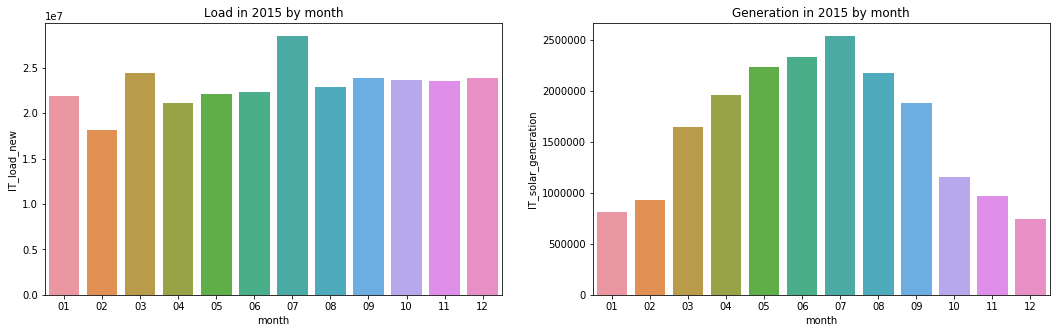

In [0]:
data15_by_month = data15.groupby('month').sum()
data15_by_month.reset_index(inplace=True)

f, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.barplot(x='month', y='IT_load_new', data=data15_by_month, ax=ax[0]).set_title('Load in 2015 by month');
sns.barplot(x='month', y='IT_solar_generation', data=data15_by_month, ax=ax[1]).set_title('Generation in 2015 by month');

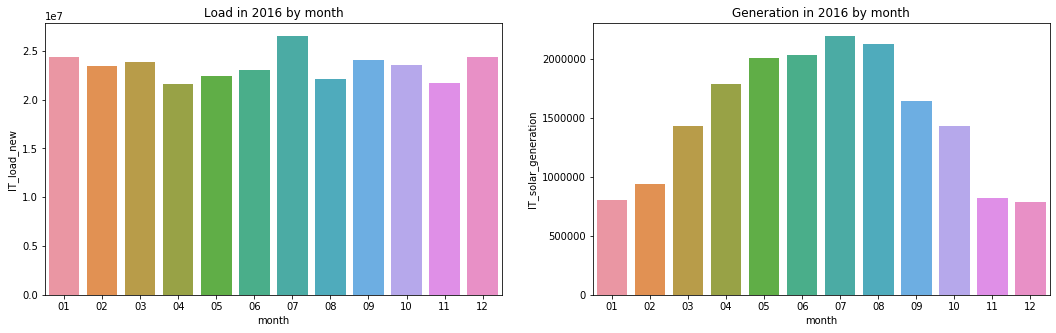

In [0]:
data16_by_month = data16.groupby('month').sum()
data16_by_month.reset_index(inplace=True)

f, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.barplot(x='month', y='IT_load_new', data=data16_by_month, ax=ax[0]).set_title('Load in 2016 by month');
sns.barplot(x='month', y='IT_solar_generation', data=data16_by_month, ax=ax[1]).set_title('Generation in 2016 by month');

Concat both dataframes to use all data

In [0]:
df = pd.concat([data15, data16], ignore_index=True)
print(len(df))
df.head(3)

17544


,utc_timestamp,IT_load_new,IT_solar_generation
0,2015-01-01T00:00:00Z,NaN,0
1,2015-01-01T01:00:00Z,NaN,0
2,2015-01-01T02:00:00Z,NaN,0


In [0]:
df.tail(3)

,utc_timestamp,IT_load_new,IT_solar_generation
17541,2016-12-31T21:00:00Z,26496.0,0
17542,2016-12-31T22:00:00Z,25276.0,0
17543,2016-12-31T23:00:00Z,23663.0,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 3 columns):
utc_timestamp          17544 non-null object
IT_load_new            17113 non-null float64
IT_solar_generation    17544 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 411.3+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35beaeada0>,
      dtype=object)

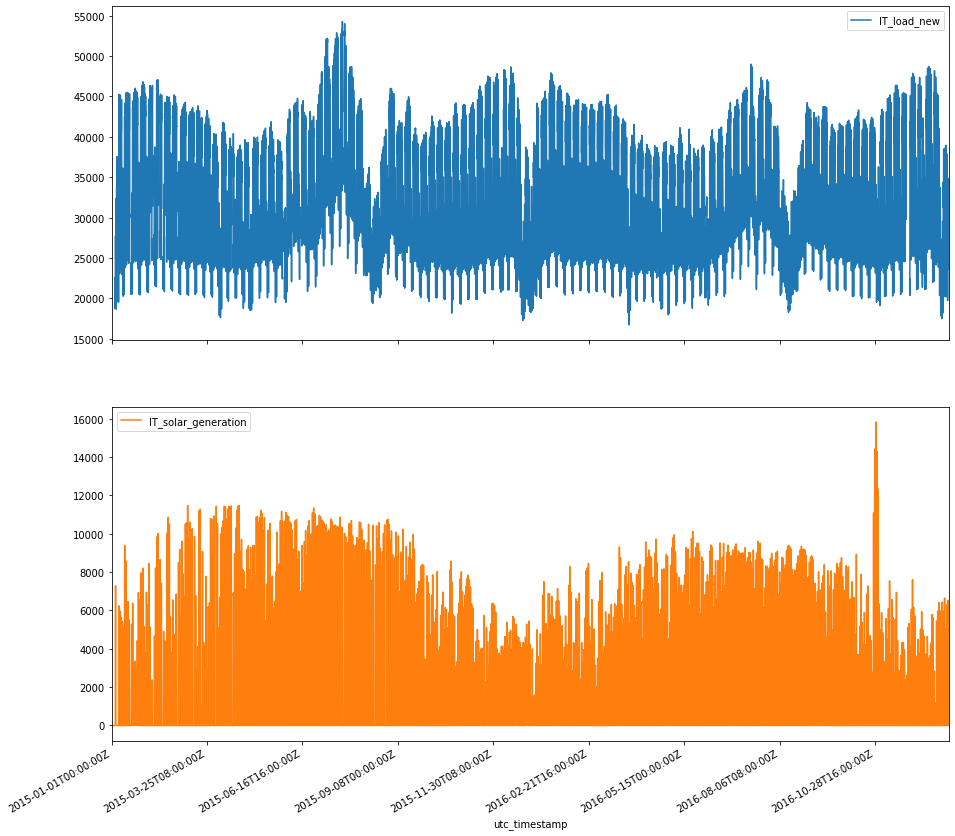

In [0]:
df.plot(x="utc_timestamp", subplots=True, figsize=(15, 15))

# Preprocess data

In [0]:
!pip install -q tensorflow_addons

     |████████████████████████████████| 1.8MB 3.4MB/s 


In [0]:
from toai.imports import *
from toai.data import DataBundle, DataParams, DataContainer
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import tensorflow_datasets as tfds

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
data_params = DataParams(
    target_col="IT_solar_generation",
    cont_cols=["utc_timestamp"],
)

In [0]:
df.dtypes

utc_timestamp           object
IT_load_new            float64
IT_solar_generation      int64
dtype: object

In [0]:
df.utc_timestamp = pd.to_datetime(df.utc_timestamp)

In [0]:
df.dtypes

utc_timestamp          datetime64[ns, UTC]
IT_load_new                        float64
IT_solar_generation                  int64
dtype: object

In [0]:
df.fillna(method="pad", inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 3 columns):
utc_timestamp          17544 non-null datetime64[ns, UTC]
IT_load_new            17473 non-null float64
IT_solar_generation    17544 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 411.3 KB


In [0]:
df.fillna(method="backfill", inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 3 columns):
utc_timestamp          17544 non-null datetime64[ns, UTC]
IT_load_new            17544 non-null float64
IT_solar_generation    17544 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 411.3 KB


In [0]:
def split_timeseries_df(
    data: pd.DataFrame, test_size: float
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
    val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)
    return train_data, val_data, test_data

#### Use only Solar generation data

In [0]:
data = df[['utc_timestamp', 'IT_solar_generation']]

In [0]:
train_data, val_data, test_data = split_timeseries_df(data, 0.4)

In [0]:
[series.shape for series in (train_data, val_data, test_data)]

[(10526, 2), (3509, 2), (3509, 2)]

In [0]:
train_data.iloc[-1], val_data.iloc[0]

(utc_timestamp          2016-03-14 13:00:00+00:00
 IT_solar_generation                         4744
 Name: 10525, dtype: object, utc_timestamp          2016-03-14 14:00:00+00:00
 IT_solar_generation                         3648
 Name: 10526, dtype: object)

In [0]:
val_data.iloc[-1], test_data.iloc[0]

(utc_timestamp          2016-08-07 18:00:00+00:00
 IT_solar_generation                           27
 Name: 14034, dtype: object, utc_timestamp          2016-08-07 19:00:00+00:00
 IT_solar_generation                            1
 Name: 14035, dtype: object)

In [0]:
def timeseries_extract_distributed_labels(
    series: np.ndarray, pred_length: int
) -> Tuple[np.ndarray, np.ndarray]:
    n_labels = series.shape[1] - pred_length
    labels = np.empty((series.shape[0], n_labels, pred_length))
    for step_ahead in range(1, pred_length + 1):
        labels[..., step_ahead - 1] = series[..., step_ahead : step_ahead + n_labels, 0]
    return series[:, :-pred_length], labels

In [0]:
series_name = "IT_solar_generation"

In [0]:
def make_standard_scaler(mean, std):
    def scaler(series):
        return (series - mean) / std

    return scaler

In [0]:
scaler = make_standard_scaler(train_data.IT_solar_generation.mean(), train_data.IT_solar_generation.std())

In [0]:
train_data, val_data, test_data = [
    scaler(series[series_name].values).reshape(1, -1, 1)
    for series in (train_data, val_data, test_data)
]

In [0]:
prediction_length = 10

In [0]:
(train_data, train_labels), (val_data, val_labels), (test_data, test_labels) = [
    timeseries_extract_distributed_labels(series, prediction_length)
    for series in (train_data, val_data, test_data)
]

In [0]:
[series.shape for series in (train_data, val_data, test_data)]

[(1, 10516, 1), (1, 3499, 1), (1, 3499, 1)]

In [0]:
[series.shape for series in (train_labels, val_labels, test_labels)]

[(1, 10516, 10), (1, 3499, 10), (1, 3499, 10)]

In [0]:
train_data[0, 1:11, 0]

array([-0.66469254, -0.66469254, -0.66469254, -0.66469254, -0.66469254,
       -0.66469254, -0.66469254, -0.66469254, -0.66469254, -0.66469254])

In [0]:
train_labels[0, 0, :]

array([-0.66469254, -0.66469254, -0.66469254, -0.66469254, -0.66469254,
       -0.66469254, -0.66469254, -0.66469254, -0.66469254, -0.66469254])

In [0]:
train_data[0, -1, 0]

-0.6646925370561891

In [0]:
val_data[0, :10, :]

array([[ 0.51289238],
       [ 0.04256858],
       [-0.42162197],
       [-0.6495208 ],
       [-0.65533125],
       [-0.65533125],
       [-0.65533125],
       [-0.65533125],
       [-0.65533125],
       [-0.66469254]])

### LSTM with Dense

In [0]:
model = keras.models.Sequential(
    [
        keras.layers.LSTM(256, return_sequences=True, input_shape=[None, 1]),
        keras.layers.LSTM(128, return_sequences=True),
        keras.layers.Dense(10),
    ]
)

In [0]:
model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adam(lr=1e-3))

In [0]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.3, min_lr=3e-5),
]

In [0]:
model.fit(
    train_data,
    train_labels,
    validation_data=(val_data, val_labels),
    epochs=500,
    verbose=2,
)

Train on 1 samples, validate on 1 samples
Epoch 1/500
1/1 - 9s - loss: 1.0056 - val_loss: 1.0371
Epoch 2/500
1/1 - 1s - loss: 0.9698 - val_loss: 0.9821
Epoch 3/500
1/1 - 1s - loss: 0.9331 - val_loss: 0.9171
Epoch 4/500
1/1 - 2s - loss: 0.8885 - val_loss: 0.8327
Epoch 5/500
1/1 - 2s - loss: 0.8288 - val_loss: 0.7194
Epoch 6/500
1/1 - 1s - loss: 0.7481 - val_loss: 0.5759
Epoch 7/500
1/1 - 2s - loss: 0.6488 - val_loss: 0.4246
Epoch 8/500
1/1 - 2s - loss: 0.5498 - val_loss: 0.3109
Epoch 9/500
1/1 - 2s - loss: 0.4840 - val_loss: 0.2580
Epoch 10/500
1/1 - 1s - loss: 0.4655 - val_loss: 0.2253
Epoch 11/500
1/1 - 2s - loss: 0.4504 - val_loss: 0.1966
Epoch 12/500
1/1 - 2s - loss: 0.4173 - val_loss: 0.1867
Epoch 13/500
1/1 - 1s - loss: 0.3893 - val_loss: 0.1955
Epoch 14/500
1/1 - 1s - loss: 0.3702 - val_loss: 0.1685
Epoch 15/500
1/1 - 1s - loss: 0.3411 - val_loss: 0.1659
Epoch 16/500
1/1 - 1s - loss: 0.3366 - val_loss: 0.1297
Epoch 17/500
1/1 - 1s - loss: 0.3125 - val_loss: 0.1171
Epoch 18/500
1/

KeyboardInterrupt: ignored

In [0]:
val_preds = model.predict(val_data)

In [0]:
def plot_timeseries(
    series: np.ndarray,
    n_steps: int,
    y_true: Optional[float] = None,
    y_pred: Optional[float] = None,
):
    plt.plot(series, ".-")
    if y_true is not None:
        plt.plot(n_steps, y_true, "bo", markersize=8)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro", markersize=8)

In [0]:
def plot_multiple_distributed_forecasts(data, labels, predictions):
    n_steps = data.shape[1]
    ahead = labels.shape[2]
    plot_timeseries(data[0, -ahead * 2 :, 0], ahead * 2)
    plt.plot(
        np.arange(ahead * 2, ahead * 3),
        labels[0, n_steps - 1, :],
        "ro-",
        label="Actual",
        markersize=5,
    )
    plt.plot(
        np.arange(ahead * 2, ahead * 3),
        predictions[0, n_steps - 1, :],
        "go-",
        label="Forecast",
        markersize=5,
    )

    plt.legend(fontsize=14)

In [0]:
train_preds = model.predict(train_data)

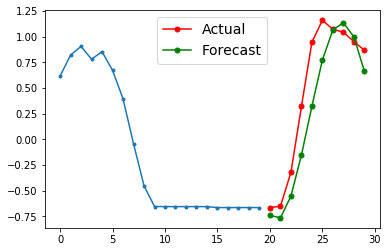

In [0]:
plot_multiple_distributed_forecasts(train_data, train_labels, train_preds)

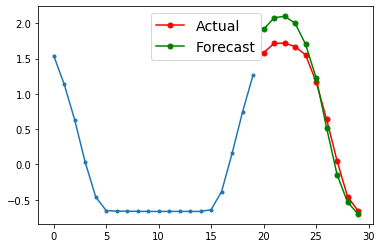

In [0]:
plot_multiple_distributed_forecasts(val_data, val_labels, val_preds)

In [0]:
test_preds = model.predict(test_data)

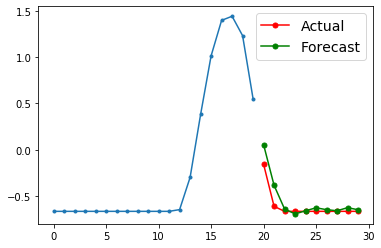

In [0]:
plot_multiple_distributed_forecasts(test_data, test_labels, test_preds)

### Change prediction lenght for 24 hours

In [0]:
prediction_length = 24

In [0]:
(train_data, train_labels), (val_data, val_labels), (test_data, test_labels) = [
    timeseries_extract_distributed_labels(series, prediction_length)
    for series in (train_data, val_data, test_data)
]

In [0]:
[series.shape for series in (train_data, val_data, test_data)]

[(1, 10502, 1), (1, 3485, 1), (1, 3485, 1)]

In [0]:
[series.shape for series in (train_labels, val_labels, test_labels)]

[(1, 10502, 24), (1, 3485, 24), (1, 3485, 24)]

In [0]:
train_data.shape, train_labels.shape

((1, 10502, 1), (1, 10502, 24))

In [0]:
model = keras.models.Sequential(
    [
        keras.layers.LSTM(256, return_sequences=True, input_shape=[None, 1]),
        keras.layers.LSTM(128, return_sequences=True),
        keras.layers.Dense(prediction_length),
    ]
)

In [0]:
model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adam(lr=1e-3))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, None, 256)         264192    
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 128)         197120    
_________________________________________________________________
dense_2 (Dense)              (None, None, 24)          3096      
Total params: 464,408
Trainable params: 464,408
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(
    train_data,
    train_labels,
    validation_data=(val_data, val_labels),
    epochs=200,
    verbose=2,
)

Train on 1 samples, validate on 1 samples
Epoch 1/200
1/1 - 7s - loss: 0.9917 - val_loss: 1.0334
Epoch 2/200
1/1 - 2s - loss: 0.9601 - val_loss: 0.9895
Epoch 3/200
1/1 - 1s - loss: 0.9256 - val_loss: 0.9354
Epoch 4/200
1/1 - 1s - loss: 0.8841 - val_loss: 0.8670
Epoch 5/200
1/1 - 2s - loss: 0.8339 - val_loss: 0.7823
Epoch 6/200
1/1 - 1s - loss: 0.7756 - val_loss: 0.6780
Epoch 7/200
1/1 - 1s - loss: 0.7050 - val_loss: 0.5551
Epoch 8/200
1/1 - 1s - loss: 0.6212 - val_loss: 0.4413
Epoch 9/200
1/1 - 1s - loss: 0.5461 - val_loss: 0.3558
Epoch 10/200
1/1 - 1s - loss: 0.4945 - val_loss: 0.3013
Epoch 11/200
1/1 - 1s - loss: 0.4724 - val_loss: 0.2562
Epoch 12/200
1/1 - 2s - loss: 0.4495 - val_loss: 0.2307
Epoch 13/200
1/1 - 2s - loss: 0.4307 - val_loss: 0.2185
Epoch 14/200
1/1 - 2s - loss: 0.4098 - val_loss: 0.1878
Epoch 15/200
1/1 - 2s - loss: 0.3780 - val_loss: 0.1807
Epoch 16/200
1/1 - 2s - loss: 0.3639 - val_loss: 0.1633
Epoch 17/200
1/1 - 1s - loss: 0.3435 - val_loss: 0.1523
Epoch 18/200
1/

In [0]:
val_preds = model.predict(val_data)
train_preds = model.predict(train_data)

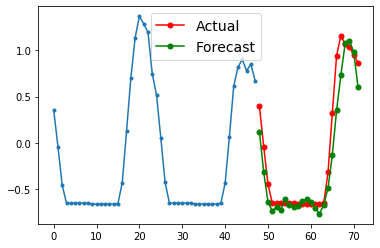

In [0]:
plot_multiple_distributed_forecasts(train_data, train_labels, train_preds)

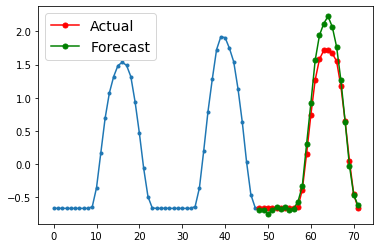

In [0]:
plot_multiple_distributed_forecasts(val_data, val_labels, val_preds)

### Use GRU with CONV1D to predict generation for next 24 hours 

In [0]:
model = keras.models.Sequential(
    [
        keras.layers.GRU(256, return_sequences=True, input_shape=[None, 1]),
        keras.layers.GRU(128, return_sequences=True),
        keras.layers.Conv1D(prediction_length, kernel_size=1),
    ]
)

In [0]:
model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adam(lr=1e-3))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 256)         198912    
_________________________________________________________________
gru_1 (GRU)                  (None, None, 128)         148224    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 24)          3096      
Total params: 350,232
Trainable params: 350,232
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(
    train_data,
    train_labels,
    validation_data=(val_data, val_labels),
    epochs=100,
    verbose=2,
)

Train on 1 samples, validate on 1 samples
Epoch 1/100
1/1 - 7s - loss: 0.9775 - val_loss: 0.9970
Epoch 2/100
1/1 - 2s - loss: 0.9326 - val_loss: 0.9387
Epoch 3/100
1/1 - 2s - loss: 0.8891 - val_loss: 0.8771
Epoch 4/100
1/1 - 1s - loss: 0.8444 - val_loss: 0.8100
Epoch 5/100
1/1 - 1s - loss: 0.7974 - val_loss: 0.7374
Epoch 6/100
1/1 - 1s - loss: 0.7491 - val_loss: 0.6619
Epoch 7/100
1/1 - 1s - loss: 0.7026 - val_loss: 0.5889
Epoch 8/100
1/1 - 1s - loss: 0.6617 - val_loss: 0.5222
Epoch 9/100
1/1 - 2s - loss: 0.6264 - val_loss: 0.4622
Epoch 10/100
1/1 - 1s - loss: 0.5917 - val_loss: 0.4144
Epoch 11/100
1/1 - 1s - loss: 0.5600 - val_loss: 0.3816
Epoch 12/100
1/1 - 1s - loss: 0.5371 - val_loss: 0.3455
Epoch 13/100
1/1 - 1s - loss: 0.5123 - val_loss: 0.3016
Epoch 14/100
1/1 - 1s - loss: 0.4821 - val_loss: 0.2775
Epoch 15/100
1/1 - 1s - loss: 0.4637 - val_loss: 0.2588
Epoch 16/100
1/1 - 1s - loss: 0.4425 - val_loss: 0.2416
Epoch 17/100
1/1 - 1s - loss: 0.4208 - val_loss: 0.2362
Epoch 18/100
1/

In [0]:
val_preds = model.predict(val_data)
train_preds = model.predict(train_data)

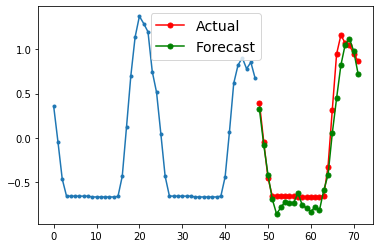

In [0]:
plot_multiple_distributed_forecasts(train_data, train_labels, train_preds)

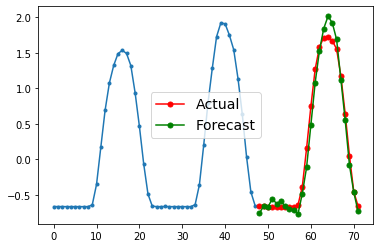

In [0]:
plot_multiple_distributed_forecasts(val_data, val_labels, val_preds)

## Use 1d convolutional model

In [0]:
model = keras.models.Sequential(
    [
        keras.layers.Conv1D(128, kernel_size=10, padding="same", input_shape=[None, 1]),
        keras.layers.Conv1D(128, kernel_size=10, padding="same"),
        keras.layers.Conv1D(128, kernel_size=10, padding="same"),
        keras.layers.Conv1D(128, kernel_size=10, padding="same"),
        keras.layers.Conv1D(128, kernel_size=10, padding="same"),
        keras.layers.Conv1D(128, kernel_size=10, padding="same"),
        keras.layers.Conv1D(128, kernel_size=10, padding="same"),
        keras.layers.Dense(prediction_length),
    ]
)

In [0]:
model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adam(lr=1e-3))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 128)         1408      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         163968    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         163968    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         163968    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 128)         163968    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 128)         163968    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 128)         1

In [0]:
model.fit(
    train_data,
    train_labels,
    validation_data=(val_data, val_labels),
    epochs=100,
    verbose=2,
)

Train on 1 samples, validate on 1 samples
Epoch 1/100
1/1 - 5s - loss: 1.0144 - val_loss: 0.6387
Epoch 2/100
1/1 - 0s - loss: 0.6346 - val_loss: 4.7405
Epoch 3/100
1/1 - 0s - loss: 3.8881 - val_loss: 0.6186
Epoch 4/100
1/1 - 0s - loss: 0.5754 - val_loss: 0.3339
Epoch 5/100
1/1 - 0s - loss: 0.3417 - val_loss: 0.4714
Epoch 6/100
1/1 - 0s - loss: 0.4411 - val_loss: 0.0801
Epoch 7/100
1/1 - 0s - loss: 0.1209 - val_loss: 0.2906
Epoch 8/100
1/1 - 0s - loss: 0.2833 - val_loss: 0.1741
Epoch 9/100
1/1 - 0s - loss: 0.1831 - val_loss: 0.1399
Epoch 10/100
1/1 - 0s - loss: 0.1518 - val_loss: 0.1520
Epoch 11/100
1/1 - 0s - loss: 0.1585 - val_loss: 0.0941
Epoch 12/100
1/1 - 0s - loss: 0.1107 - val_loss: 0.1044
Epoch 13/100
1/1 - 0s - loss: 0.1164 - val_loss: 0.0822
Epoch 14/100
1/1 - 0s - loss: 0.0964 - val_loss: 0.0709
Epoch 15/100
1/1 - 0s - loss: 0.0845 - val_loss: 0.0732
Epoch 16/100
1/1 - 0s - loss: 0.0858 - val_loss: 0.0759
Epoch 17/100
1/1 - 0s - loss: 0.0871 - val_loss: 0.0556
Epoch 18/100
1/

In [0]:
val_preds = model.predict(val_data)
train_preds = model.predict(train_data)

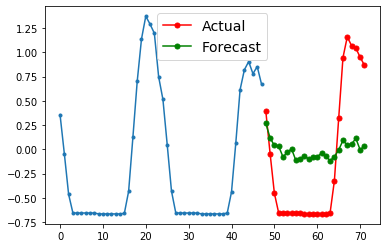

In [0]:
plot_multiple_distributed_forecasts(train_data, train_labels, train_preds)

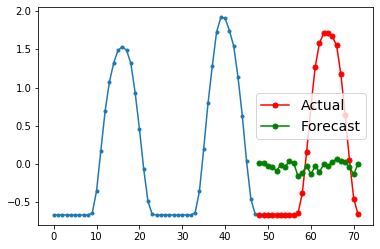

In [0]:
plot_multiple_distributed_forecasts(val_data, val_labels, val_preds)

### Use only LSTM

In [0]:
model = keras.models.Sequential(
    [
        keras.layers.LSTM(256, return_sequences=True, input_shape=[None, 1]),
        keras.layers.LSTM(prediction_length, return_sequences=True),
    ]
)

In [0]:
model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adam(lr=1e-3))

In [184]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, None, 256)         264192    
_________________________________________________________________
lstm_33 (LSTM)               (None, None, 24)          26976     
Total params: 291,168
Trainable params: 291,168
Non-trainable params: 0
_________________________________________________________________


In [185]:
train_data.shape, train_labels.shape

((1, 10502, 1), (1, 10502, 24))

In [186]:
model.fit(
    train_data,
    train_labels,
    validation_data=(val_data, val_labels),
    epochs=100,
    verbose=2,
)

Train on 1 samples, validate on 1 samples
Epoch 1/100
1/1 - 6s - loss: 1.0076 - val_loss: 1.0688
Epoch 2/100
1/1 - 2s - loss: 0.9889 - val_loss: 1.0452
Epoch 3/100
1/1 - 1s - loss: 0.9704 - val_loss: 1.0198
Epoch 4/100
1/1 - 1s - loss: 0.9508 - val_loss: 0.9908
Epoch 5/100
1/1 - 1s - loss: 0.9293 - val_loss: 0.9570
Epoch 6/100
1/1 - 1s - loss: 0.9053 - val_loss: 0.9163
Epoch 7/100
1/1 - 1s - loss: 0.8767 - val_loss: 0.8652
Epoch 8/100
1/1 - 1s - loss: 0.8405 - val_loss: 0.8023
Epoch 9/100
1/1 - 1s - loss: 0.7966 - val_loss: 0.7312
Epoch 10/100
1/1 - 1s - loss: 0.7484 - val_loss: 0.6620
Epoch 11/100
1/1 - 1s - loss: 0.7000 - val_loss: 0.6098
Epoch 12/100
1/1 - 1s - loss: 0.6589 - val_loss: 0.5681
Epoch 13/100
1/1 - 1s - loss: 0.6252 - val_loss: 0.5375
Epoch 14/100
1/1 - 1s - loss: 0.6036 - val_loss: 0.5727
Epoch 15/100
1/1 - 1s - loss: 0.6385 - val_loss: 0.5111
Epoch 16/100
1/1 - 1s - loss: 0.5785 - val_loss: 0.5117
Epoch 17/100
1/1 - 1s - loss: 0.5762 - val_loss: 0.4764
Epoch 18/100
1/

In [0]:
val_preds = model.predict(val_data)
train_preds = model.predict(train_data)

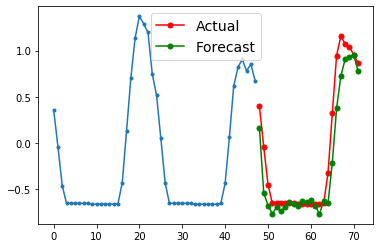

In [188]:
plot_multiple_distributed_forecasts(train_data, train_labels, train_preds)

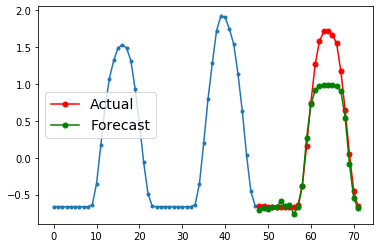

In [189]:
plot_multiple_distributed_forecasts(val_data, val_labels, val_preds)

## For now the best result was when using LSTM with Dense layer. Predict data for 1 week

In [0]:
prediction_length = 24 * 7

In [0]:
(train_data, train_labels), (val_data, val_labels), (test_data, test_labels) = [
    timeseries_extract_distributed_labels(series, prediction_length)
    for series in (train_data, val_data, test_data)
]

In [192]:
[series.shape for series in (train_data, val_data, test_data)]

[(1, 10334, 1), (1, 3317, 1), (1, 3317, 1)]

In [193]:
[series.shape for series in (train_labels, val_labels, test_labels)]

[(1, 10334, 168), (1, 3317, 168), (1, 3317, 168)]

In [0]:
model = keras.models.Sequential(
    [
        keras.layers.LSTM(256, return_sequences=True, input_shape=[None, 1]),
        keras.layers.LSTM(128, return_sequences=True),
        keras.layers.Dense(prediction_length),
    ]
)

In [0]:
model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adam(lr=1e-3))

In [196]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, None, 256)         264192    
_________________________________________________________________
lstm_35 (LSTM)               (None, None, 128)         197120    
_________________________________________________________________
dense_1 (Dense)              (None, None, 168)         21672     
Total params: 482,984
Trainable params: 482,984
Non-trainable params: 0
_________________________________________________________________


In [197]:
model.fit(
    train_data,
    train_labels,
    validation_data=(val_data, val_labels),
    epochs=200,
    verbose=2,
)

Train on 1 samples, validate on 1 samples
Epoch 1/200
1/1 - 6s - loss: 1.0066 - val_loss: 1.0747
Epoch 2/200
1/1 - 2s - loss: 0.9958 - val_loss: 1.0576
Epoch 3/200
1/1 - 2s - loss: 0.9831 - val_loss: 1.0351
Epoch 4/200
1/1 - 2s - loss: 0.9665 - val_loss: 1.0037
Epoch 5/200
1/1 - 2s - loss: 0.9438 - val_loss: 0.9597
Epoch 6/200
1/1 - 2s - loss: 0.9131 - val_loss: 0.8986
Epoch 7/200
1/1 - 2s - loss: 0.8715 - val_loss: 0.8183
Epoch 8/200
1/1 - 2s - loss: 0.8175 - val_loss: 0.7279
Epoch 9/200
1/1 - 2s - loss: 0.7571 - val_loss: 0.6470
Epoch 10/200
1/1 - 2s - loss: 0.7018 - val_loss: 0.5844
Epoch 11/200
1/1 - 2s - loss: 0.6601 - val_loss: 0.5352
Epoch 12/200
1/1 - 2s - loss: 0.6316 - val_loss: 0.5259
Epoch 13/200
1/1 - 2s - loss: 0.6275 - val_loss: 0.4660
Epoch 14/200
1/1 - 2s - loss: 0.5770 - val_loss: 0.4416
Epoch 15/200
1/1 - 2s - loss: 0.5540 - val_loss: 0.4082
Epoch 16/200
1/1 - 2s - loss: 0.5350 - val_loss: 0.3750
Epoch 17/200
1/1 - 2s - loss: 0.5038 - val_loss: 0.3714
Epoch 18/200
1/

In [0]:
val_preds = model.predict(val_data)
train_preds = model.predict(train_data)

In [0]:
def plot_multiple_distributed_forecasts(data, labels, predictions):
    n_steps = data.shape[1]
    ahead = labels.shape[2]
    plt.figure(figsize=(18, 5))
    plot_timeseries(data[0, -ahead * 2 :, 0], ahead * 2)
    plt.plot(
        np.arange(ahead * 2, ahead * 3),
        labels[0, n_steps - 1, :],
        "ro-",
        label="Actual",
        markersize=5,
    )
    plt.plot(
        np.arange(ahead * 2, ahead * 3),
        predictions[0, n_steps - 1, :],
        "go-",
        label="Forecast",
        markersize=5,
    )

    plt.legend(fontsize=14)

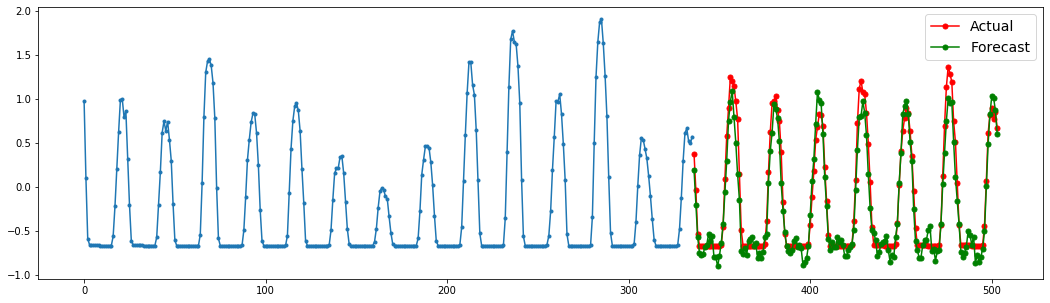

In [201]:
plot_multiple_distributed_forecasts(train_data, train_labels, train_preds)

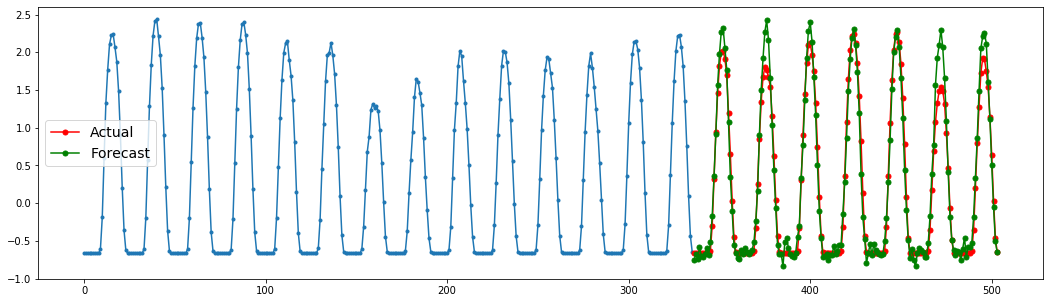

In [202]:
plot_multiple_distributed_forecasts(val_data, val_labels, val_preds)

In [0]:
test_preds = model.predict(test_data)

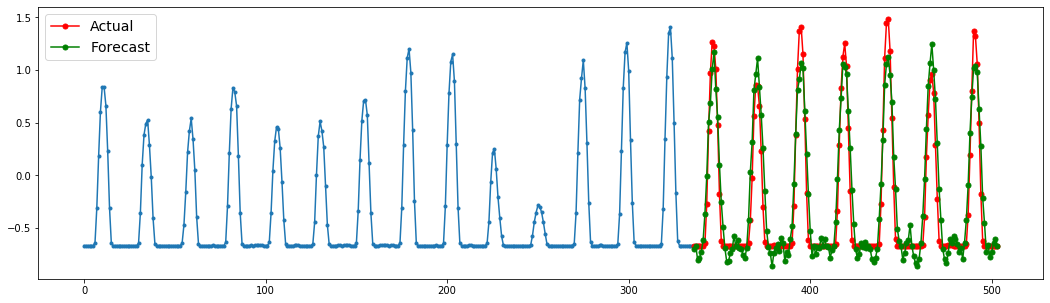

In [204]:
plot_multiple_distributed_forecasts(test_data, test_labels, test_preds)